In [1]:

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 1 = malignant, 0 = benign


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Precision: 0.99
Recall: 0.99
ROC AUC: 1.00


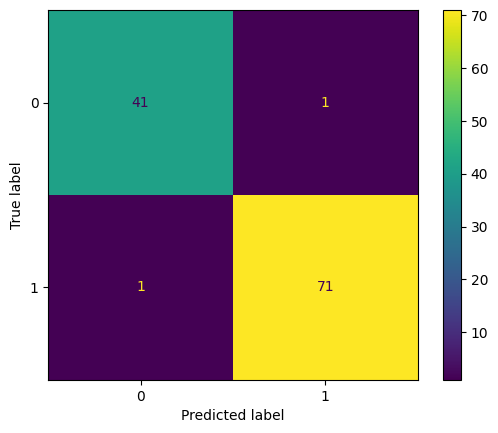

In [4]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)

# Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


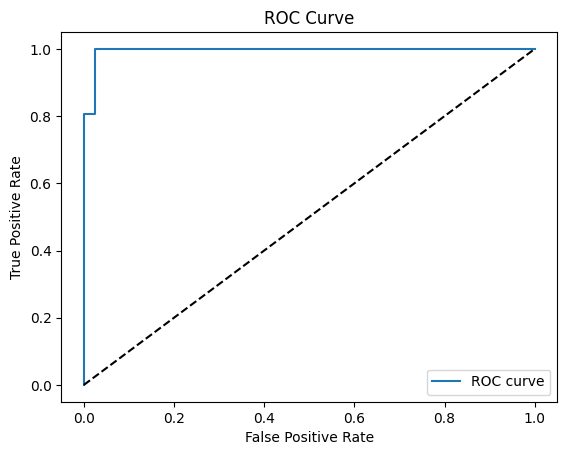

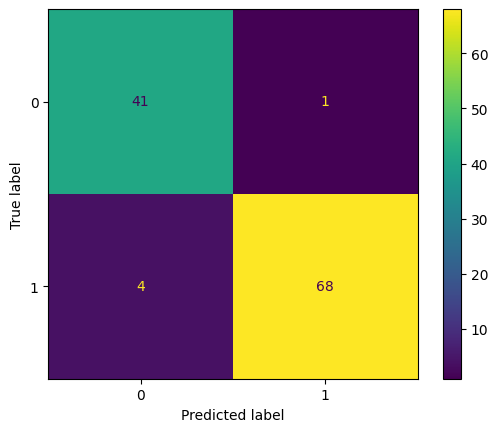

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Tune threshold (example)
custom_threshold = 0.6
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# New confusion matrix
cm_custom = confusion_matrix(y_test, y_pred_custom)
ConfusionMatrixDisplay(cm_custom).plot()
